# FFT Introduction
Using `scipy.fft` 

給定一矩陣 x (t space)，對其進行 FFT，產生 y 矩陣 (s space)

In [1]:
import numpy as np
from scipy.fft import fft, ifft

x = np.array([1.0, 2.0, 1.0, -1.0, 1.5])
y = fft(x)
yinv = ifft(y)

[ 4.5       -0.j          2.08155948-1.65109876j -1.83155948+1.60822041j
 -1.83155948-1.60822041j  2.08155948+1.65109876j]
[ 1. +0.j  2. +0.j  1. +0.j -1. +0.j  1.5+0.j]
4.5


In [ ]:
print('y:', y)

In [ ]:
print('yinv:', yinv)

In [ ]:
print('sum:', np.sum(x))

### Example of the FFT of the sum of two sines

將兩個波疊加，使用FFT分析


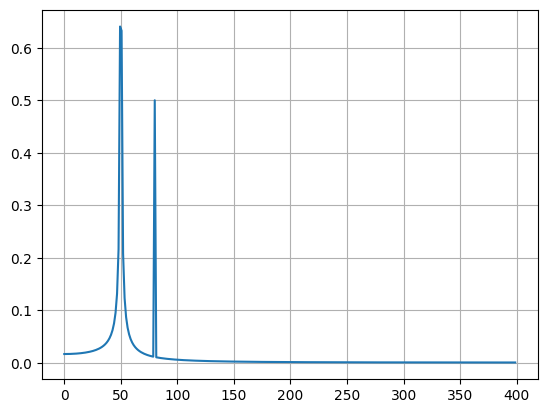

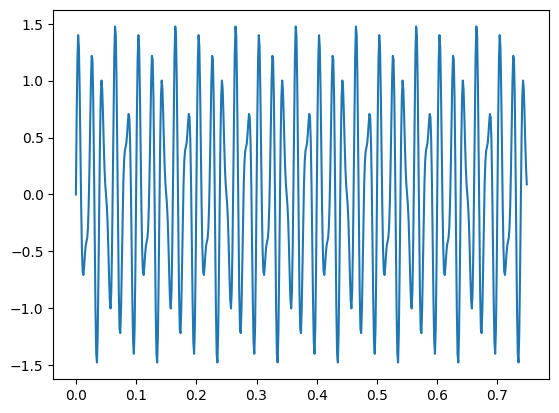

In [2]:
import numpy as np
from scipy.fft import fft, fftfreq
import matplotlib.pyplot as plt

# Number of sample points
N = 600 

# sample spacing
T = 1.0 / 800.0 #給定週期
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x) #兩個波
yf = fft(y) #轉換
xf = fftfreq(N, T)[:N//2] #頻率

plt.figure(2) #波譜分析(s space)
plt.plot(xf, 2.0/N * np.abs(yf[0:N//2]))
plt.grid()

plt.figure(1) #真實值(t space)
plt.plot(x,y)

plt.show()

在兩個波中乘上一個東西(高斯分布的函數)，對其進行FFT分析

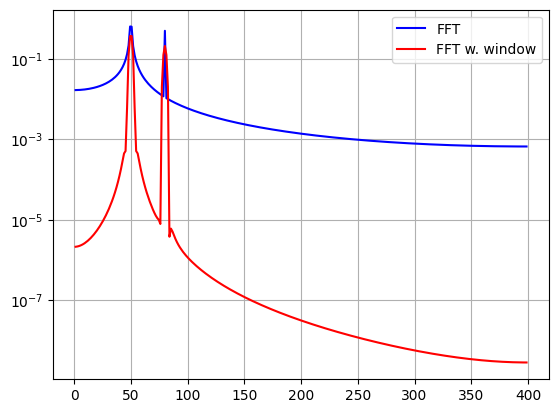

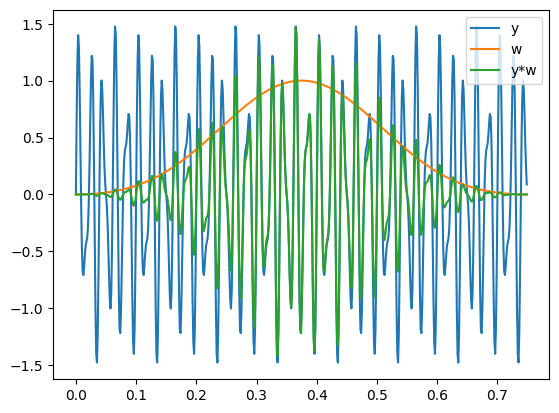

In [3]:
import numpy as np
from scipy.fft import fft, fftfreq
from scipy.signal import blackman
import matplotlib.pyplot as plt

# Number of sample points
N = 600

# sample spacing
T = 1.0 / 800.0
x = np.linspace(0.0, N*T, N, endpoint=False)
y = np.sin(50.0 * 2.0*np.pi*x) + 0.5*np.sin(80.0 * 2.0*np.pi*x)
yf = fft(y)
w = blackman(N) #在波中加入一個擾動
ywf = fft(y*w)
xf = fftfreq(N, T)[:N//2]

plt.figure(2) #波譜分析
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(yf[1:N//2]), '-b')
plt.semilogy(xf[1:N//2], 2.0/N * np.abs(ywf[1:N//2]), '-r')
plt.legend(['FFT', 'FFT w. window'])
plt.grid()

plt.figure(1) #真實波疊加後的樣子
plt.plot(x,y)
plt.plot(x,w)
plt.plot(x,y*w)
plt.legend(['y', 'w', 'y*w'])


plt.show()